# Heart Failure Prediction
#### https://www.kaggle.com/fedesoriano/heart-failure-prediction

Utilice este Notebook para entrenar un modelo que permita clasificar a una persona como propensa a sufrir de una deficiencia cardiaca, a partir de datos clínicos recopilados. Para esto, utilice el dataset "heart.csv". Este dataset se obtuvo de: https://www.kaggle.com/fedesoriano/heart-failure-prediction

La descripción de las columnas es la siguiente:

Age: age
Sex: sex
ChestPainType: chest pain type
RestingBP: resting blood pressure
Cholesterol: serum cholesterol
FastingBS: fasting blood sugar
RestingECG: resting electrocardiogram results
MaxHR: maximum heart rate achieved
ExerciseAngina: exercise induced angina
Oldpeak: oldpeak = ST
ST_Slope: the slope of the peak exercise ST segment
HeartDisease: target

Desarrolle la exploración de datos, incluida la presentación de gráficas, y el procedimiento para entrenar un modelo. Presente la matriz de confusión y el dataset con las columnas de los valores junto con su predicción.

Importante, aplique varios estimadores (o algoritmos) para establecer el que ofrezca la mejor exactitud.

In [1]:
from pandas_profiling import ProfileReport

import pandas as pd 

import numpy as np 

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

color = sns.color_palette()
py.init_notebook_mode(connected=True)


# Pre-procesamiento de Datos

In [2]:
heart = pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
print(heart.ChestPainType.unique(), '- ChestPainType')
print(heart.Sex.unique(), '- Sex')
print(heart.RestingECG.unique(), '- RestingECG')
print(heart.ExerciseAngina.unique(), '- ExerciseAngina')
print(heart.ST_Slope.unique(), '- ST_Slope')


['ATA' 'NAP' 'ASY' 'TA'] - ChestPainType
['M' 'F'] - Sex
['Normal' 'ST' 'LVH'] - RestingECG
['N' 'Y'] - ExerciseAngina
['Up' 'Flat' 'Down'] - ST_Slope


In [5]:
# crear un dataframe de variables dummies
dummy_Sex = pd.get_dummies(heart["Sex"], prefix="state",drop_first=True)
dummy_ExerciseAngina = pd.get_dummies(heart["ExerciseAngina"], prefix="Exercise", drop_first=True)
# el argumento drop_first elimina la primera variable para evitar colinealidad

In [6]:
# Borrar la variable original
heart = heart.drop(["Sex"], axis = 1)

# Concatenar las variables dummies con el dataframe original
heart = pd.concat([dummy_Sex, heart], axis = 1)

# Borrar la variable original
heart = heart.drop(["ExerciseAngina"], axis = 1)

# Concatenar las variables dummies con el dataframe original
heart = pd.concat([dummy_ExerciseAngina, heart], axis = 1)


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
heart['RestingECG'] = le.fit_transform(heart['RestingECG'])
heart['ST_Slope'] = le.fit_transform(heart['ST_Slope'])
heart['ChestPainType'] = le.fit_transform(heart['ChestPainType'])

In [8]:
print(heart.ChestPainType.unique(), '- ChestPainType')
print(heart.state_M.unique(), '- Sex')
print(heart.RestingECG.unique(), '- RestingECG')
print(heart.Exercise_Y.unique(), '- ExerciseAngina')
print(heart.ST_Slope.unique(), '- ST_Slope')


[1 2 0 3] - ChestPainType
[1 0] - Sex
[1 2 0] - RestingECG
[0 1] - ExerciseAngina
[2 1 0] - ST_Slope


In [9]:
prueba = pd.read_csv('heart.csv', usecols = ['ChestPainType'])

prueba

,ChestPainType
0,ATA
1,NAP
2,ATA
3,ASY
4,NAP
...,...
913,TA
914,ASY
915,ASY
916,ATA


In [10]:
prueba['ChestPainType'] = le.fit_transform(heart['ChestPainType'])
prueba

,ChestPainType
0,1
1,2
2,1
3,0
4,2
...,...
913,3
914,0
915,0
916,1


In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Exercise_Y     918 non-null    uint8  
 1   state_M        918 non-null    uint8  
 2   Age            918 non-null    int64  
 3   ChestPainType  918 non-null    int64  
 4   RestingBP      918 non-null    int64  
 5   Cholesterol    918 non-null    int64  
 6   FastingBS      918 non-null    int64  
 7   RestingECG     918 non-null    int64  
 8   MaxHR          918 non-null    int64  
 9   Oldpeak        918 non-null    float64
 10  ST_Slope       918 non-null    int64  
 11  HeartDisease   918 non-null    int64  
dtypes: float64(1), int64(9), uint8(2)
memory usage: 73.6 KB


# Visualizacion

/home/jhoser/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



array([[<AxesSubplot:title={'center':'Exercise_Y'}>,
        <AxesSubplot:title={'center':'state_M'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'ChestPainType'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'RestingECG'}>,
        <AxesSubplot:title={'center':'MaxHR'}>],
       [<AxesSubplot:title={'center':'Oldpeak'}>,
        <AxesSubplot:title={'center':'ST_Slope'}>,
        <AxesSubplot:title={'center':'HeartDisease'}>]], dtype=object)

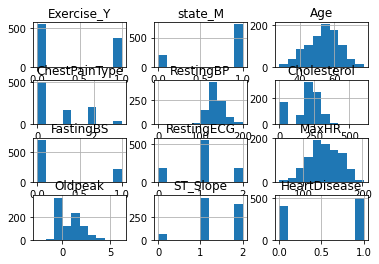

In [12]:
heart.hist()

In [13]:
print (f'Una persona Femenina tiene una probabilidad de {round(heart[heart["state_M"]==0]["HeartDisease"].mean()*100,2)} % de tener una enfermedad cardíaca. ')
print (f'Una persona Masculina tiene una probabilidad de {round(heart[heart["state_M"]==1]["HeartDisease"].mean()*100,2)} % de tener una enfermedad cardíaca. ')

fig = px.histogram(heart, x="state_M", color="HeartDisease")
fig.update_traces(marker_line_color='rgb(0,0,0)',
                  marker_line_width=1)
fig.show()


Una persona Femenina tiene una probabilidad de 25.91 % de tener una enfermedad cardíaca. 
Una persona Masculina tiene una probabilidad de 63.17 % de tener una enfermedad cardíaca. 


In [14]:
corr = heart.corr()
corr.style.background_gradient(cmap='YlOrRd')  


,Exercise_Y,state_M,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease
Exercise_Y,1.000000,0.190664,0.215793,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,0.408752,-0.428706,0.494282
state_M,0.190664,1.000000,0.055750,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.105734,-0.150693,0.305445
Age,0.215793,0.055750,1.000000,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.258612,-0.268264,0.282039
ChestPainType,-0.354727,-0.126559,-0.077150,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.177377,0.213521,-0.386828
RestingBP,0.155101,0.005133,0.254399,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.164803,-0.075162,0.107589
Cholesterol,-0.034166,-0.200092,-0.095282,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,0.050148,0.111471,-0.232741
FastingBS,0.060451,0.120076,0.198039,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.052698,-0.175774,0.267291
RestingECG,0.077500,0.071552,-0.007484,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,-0.020438,-0.006778,0.057384
MaxHR,-0.370425,-0.189186,-0.382045,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.160691,0.343419,-0.400421
Oldpeak,0.408752,0.105734,0.258612,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,1.000000,-0.501921,0.403951


In [15]:
fig = px.histogram(heart, x="HeartDisease")
fig.update_traces(marker_color="pink",marker_line_color='rgb(0,0,0)',
                  marker_line_width=1)
fig.update_layout(title_text='Heart Disease')
fig.show()

In [16]:
import plotly.graph_objects as go

labels = [x for x in heart.ChestPainType.value_counts().index]
values = heart.ChestPainType.value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.06, 0])])

fig.update_layout(
    title_text="Chest pain type")
    
fig.show()

# Dividir los datos de train y test  

In [17]:
# Escogiendo las columnas para el entrenamiento y la columna objetivo
y = heart.pop('HeartDisease')
X = heart

In [18]:
X

,Exercise_Y,state_M,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope
0,0,1,40,1,140,289,0,1,172,0.0,2
1,0,0,49,2,160,180,0,1,156,1.0,1
2,0,1,37,1,130,283,0,2,98,0.0,2
3,1,0,48,0,138,214,0,1,108,1.5,1
4,0,1,54,2,150,195,0,1,122,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,45,3,110,264,0,1,132,1.2,1
914,0,1,68,0,144,193,1,1,141,3.4,1
915,1,1,57,0,130,131,0,1,115,1.2,1
916,0,0,57,1,130,236,0,0,174,0.0,1


In [19]:
# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
# Paso 4. ajustar el modelo
# estimador que es capaz de aprender de los datos a través de su método fit().
regression.fit(X_train, y_train)
lr_predict = regression.predict(X_test)

/home/jhoser/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [21]:
#0 	1 	45 	3 	110 	264 	0 	1 	132 	1.2 	1

regression.predict(X_test)
print(regression.predict([['0','1','40','1','140','289','0','1','172','0.0','2']])[0])


0


/home/jhoser/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/jhoser/anaconda3/lib/python3.8/site-packages/sklearn/base.py:561: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, lr_predict)
dt_acc_score = accuracy_score(y_test, lr_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[59 18]
 [11 96]]
84.23913043478261


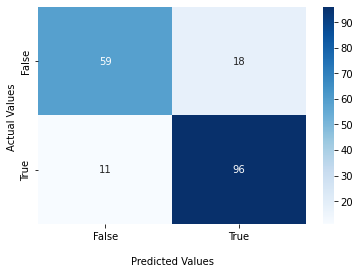

In [23]:
cf_matrix = confusion_matrix(y_test, lr_predict)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [24]:
from sklearn.metrics import classification_report
report = classification_report(y_test, lr_predict, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
0,0.842857,0.766234,0.802721,77.000000
1,0.842105,0.897196,0.868778,107.000000
accuracy,0.842391,0.842391,0.842391,0.842391
macro avg,0.842481,0.831715,0.835750,184.000000
weighted avg,0.842420,0.842391,0.841135,184.000000


# Decision Tree Classifier 

In [25]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)
dt_predict = arbol.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[62 15]
 [30 77]]
75.54347826086956


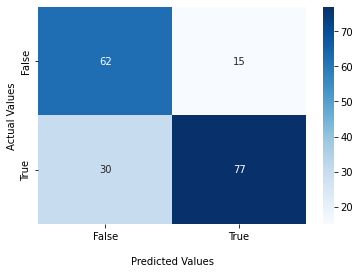

In [27]:
cf_matrix = confusion_matrix(y_test, dt_predict)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [28]:
from sklearn.metrics import classification_report
report = classification_report(y_test, dt_predict, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
0,0.673913,0.805195,0.733728,77.000000
1,0.836957,0.719626,0.773869,107.000000
accuracy,0.755435,0.755435,0.755435,0.755435
macro avg,0.755435,0.762410,0.753799,184.000000
weighted avg,0.768726,0.755435,0.757071,184.000000


# GaussianNB

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict=nb.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, nb_predict)
dt_acc_score = accuracy_score(y_test, nb_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[62 15]
 [13 94]]
84.78260869565217


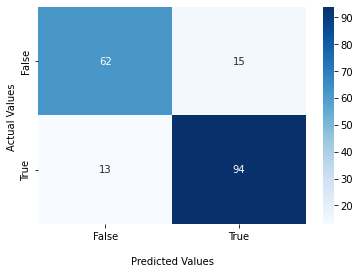

In [31]:
cf_matrix = confusion_matrix(y_test, nb_predict)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [32]:
from sklearn.metrics import classification_report
report = classification_report(y_test, nb_predict, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
0,0.826667,0.805195,0.815789,77.000000
1,0.862385,0.878505,0.870370,107.000000
accuracy,0.847826,0.847826,0.847826,0.847826
macro avg,0.844526,0.841850,0.843080,184.000000
weighted avg,0.847438,0.847826,0.847529,184.000000


# Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [34]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[60 17]
 [12 95]]
0.842391304347826


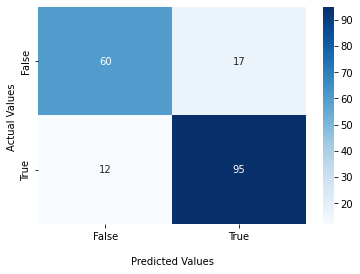

In [35]:
cf_matrix = confusion_matrix(y_test, rf_predict)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [36]:
from sklearn.metrics import classification_report
report = classification_report(y_test, rf_predict, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
0,0.833333,0.779221,0.805369,77.000000
1,0.848214,0.887850,0.867580,107.000000
accuracy,0.842391,0.842391,0.842391,0.842391
macro avg,0.840774,0.833536,0.836475,184.000000
weighted avg,0.841987,0.842391,0.841546,184.000000


# K-Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=11)
kn.fit(X_train, y_train)
kn_predict = kn.predict(X_test)

In [38]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, kn_predict)
rf_acc_score = accuracy_score(y_test, kn_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[54 23]
 [28 79]]
72.28260869565217


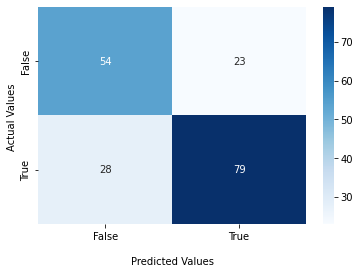

In [39]:
cf_matrix = confusion_matrix(y_test, kn_predict)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [40]:
from sklearn.metrics import classification_report
report = classification_report(y_test, kn_predict, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
0,0.658537,0.701299,0.679245,77.000000
1,0.774510,0.738318,0.755981,107.000000
accuracy,0.722826,0.722826,0.722826,0.722826
macro avg,0.716523,0.719808,0.717613,184.000000
weighted avg,0.725978,0.722826,0.723869,184.000000


# Escogiendo el mejor modelo mediante la exactitud de la prediccion


In [41]:
from sklearn.metrics import  accuracy_score
# LinearRegression 
lr_accuracy = accuracy_score(y_test, lr_predict)
# DecisionTreeClassifier
dt_accuracy = accuracy_score(y_test, dt_predict)
# GaussianNB
nb_accuracy = accuracy_score(y_test, nb_predict)
# RandomForestClassifier
rf_accuracy = accuracy_score(y_test, rf_predict)
# K-Nearest Neighbors
kn_accuracy = accuracy_score(y_test, kn_predict)

In [42]:
accuracyModel = []
accuracyModel.append(["Random Forest", rf_accuracy*100])
accuracyModel.append(["Linear Regression", lr_accuracy*100])
accuracyModel.append(["Decision Tree", dt_accuracy*100])
accuracyModel.append(["GaussianNB", nb_accuracy*100])
accuracyModel.append(["KNearest Neighbors", kn_accuracy*100])

accuracyModel = sorted(accuracyModel, key = lambda x: float(x[1]), reverse=True)
accuracyModel

[['GaussianNB', 84.78260869565217],
 ['Random Forest', 84.23913043478261],
 ['Linear Regression', 84.23913043478261],
 ['Decision Tree', 75.54347826086956],
 ['KNearest Neighbors', 72.28260869565217]]

In [43]:
print('Listado de Modelo')
for s in accuracyModel:
    print("Modelo =>", s[0], "con exactitud de", round(s[1],3), "%")

Listado de Modelo
Modelo => GaussianNB con exactitud de 84.783 %
Modelo => Random Forest con exactitud de 84.239 %
Modelo => Linear Regression con exactitud de 84.239 %
Modelo => Decision Tree con exactitud de 75.543 %
Modelo => KNearest Neighbors con exactitud de 72.283 %


In [44]:
resultados = pd.DataFrame(accuracyModel)
resultados.columns = ['Nombre','Exactitud']
resultados.sort_values(by=['Exactitud'], ascending=False,inplace=True)
fig = px.bar(resultados, x='Nombre', y='Exactitud', title='Comparacion de modelos',
             labels={'index':'Exactitud'})
fig.show()

# El mejor modelo es:

In [45]:

print('El mejor modelo es:', accuracyModel[0][0], 'con exactitud de:', accuracyModel[0][1], '%')


El mejor modelo es: GaussianNB con exactitud de: 84.78260869565217 %
